In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
l=['sepal length','sepal width','petal length','petal width','target']
df=pd.read_csv('test1.csv',header=None,names=l)
df.head(20)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [12]:
y=df[['target']]
x=df[['sepal length','sepal width','petal length','petal width']]
x.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
#standarize the data
m=df.loc[:,['sepal length','sepal width','petal length','petal width']].values
n=df.loc[:,['target']].values
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(m)
#Reduce the dimension from 4 to 2

[[-0.9552017   1.04965641 -1.3797345  -1.36551809]
 [-1.18989499 -0.09376016 -1.3797345  -1.36551809]
 [-1.42458828  0.36360647 -1.43602722 -1.36551809]
 [-1.54193493  0.13492316 -1.32344179 -1.36551809]
 [-1.07254835  1.27833973 -1.3797345  -1.36551809]
 [-0.60316176  1.96438967 -1.21085635 -1.09591925]
 [-1.54193493  0.8209731  -1.3797345  -1.23071867]
 [-1.07254835  0.8209731  -1.32344179 -1.36551809]
 [-1.77662822 -0.32244347 -1.3797345  -1.36551809]
 [-1.18989499  0.13492316 -1.32344179 -1.5003175 ]
 [-0.60316176  1.50702304 -1.32344179 -1.36551809]
 [-1.30724164  0.8209731  -1.26714907 -1.36551809]
 [-1.30724164 -0.09376016 -1.3797345  -1.5003175 ]
 [-1.89397487 -0.09376016 -1.54861266 -1.5003175 ]
 [-0.13377518  2.19307299 -1.49231994 -1.36551809]
 [-0.25112182  3.10780625 -1.32344179 -1.09591925]
 [-0.60316176  1.96438967 -1.43602722 -1.09591925]
 [-0.9552017   1.04965641 -1.3797345  -1.23071867]
 [-0.25112182  1.73570636 -1.21085635 -1.23071867]
 [-0.9552017   1.73570636 -1.32

In [30]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pcomp=pca.fit_transform(x)
pdf=pd.DataFrame(data=pcomp,columns=['pcomp1','pcomp2'])
pdf.head()
fdf=pd.concat([pdf,df[['target']]],axis=1)
fdf.head()

,pcomp1,pcomp2,target
0,-2.356020,0.470699,setosa
1,-2.163135,-0.668989,setosa
2,-2.442747,-0.346090,setosa
3,-2.374951,-0.599217,setosa
4,-2.479432,0.632896,setosa


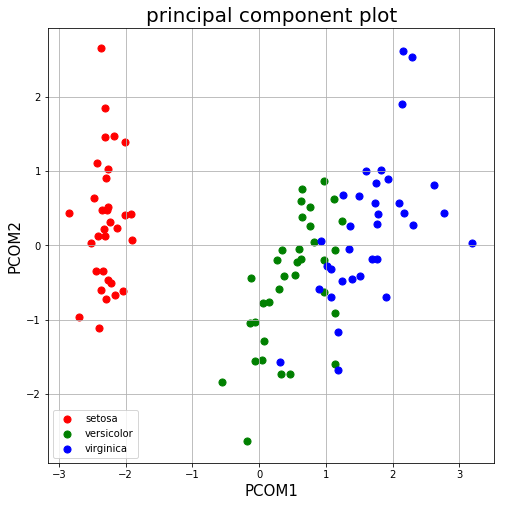

In [39]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('PCOM1', fontsize = 15)
ax.set_ylabel('PCOM2', fontsize = 15)
ax.set_title('principal component plot',fontsize = 20)

targets = ['setosa','versicolor','virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = fdf['target'] == target
    ax.scatter(fdf.loc[indicesToKeep,'pcomp1'],fdf.loc[indicesToKeep,'pcomp2'],c = color,s = 50)
ax.legend(targets)
ax.grid()